In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import colors as mcolors
import pandas as pd
import sklearn as sk
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
%matplotlib inline

In [ ]:
link = "/content/drive/MyDrive/training_dataset_cleaned.csv"

In [ ]:
training_dataset = pd.read_csv(link,index_col=0)
training_dataset.head()

,mjd_size,passband_mean,passband_median,passband_std,flux_min,flux_max,flux_mean,flux_median,flux_std,flux_skew,...,decl,gal_l,gal_b,ddf,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,in_our_galaxy
object_id,,,,,,,,,,,,,,,,,,,,,
615,352,2.457386,2.0,1.720797,-1100.440063,660.626343,-123.096998,-89.477524,1.899255,-0.349540,...,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,-4.074542,class_92,1
713,350,2.400000,2.0,1.746056,-14.735178,14.770886,-1.423351,-0.873032,1.213788,0.014989,...,-27.784405,223.525509,-54.460748,1,1.6267,0.2552,45.4063,-4.961845,class_88,0
730,330,2.336364,2.0,1.758750,-19.159811,47.310059,2.267434,0.409172,1.293874,3.177854,...,-6.579593,170.455585,-61.548219,1,0.2262,0.0157,40.2561,-3.863233,class_42,0
745,351,2.378917,2.0,1.747328,-15.494463,220.795212,8.909206,1.035895,1.619018,4.979826,...,-45.586655,328.254458,-68.969298,1,0.2813,1.1523,40.7951,-4.961845,class_90,0
1124,352,2.457386,2.0,1.720797,-16.543753,143.600189,7.145702,1.141288,1.553364,4.406298,...,-63.823658,316.922299,-51.059403,1,0.2415,0.0176,40.4166,-3.729701,class_90,0


In [ ]:
Y = training_dataset['target']
Y.head()

object_id
615     class_92
713     class_88
730     class_42
745     class_90
1124    class_90
Name: target, dtype: object

In [ ]:
X = training_dataset.drop(['target'], axis=1)
X.head()

,mjd_size,passband_mean,passband_median,passband_std,flux_min,flux_max,flux_mean,flux_median,flux_std,flux_skew,...,ra,decl,gal_l,gal_b,ddf,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,in_our_galaxy
object_id,,,,,,,,,,,,,,,,,,,,,
615,352,2.457386,2.0,1.720797,-1100.440063,660.626343,-123.096998,-89.477524,1.899255,-0.349540,...,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,-4.074542,1
713,350,2.400000,2.0,1.746056,-14.735178,14.770886,-1.423351,-0.873032,1.213788,0.014989,...,53.085938,-27.784405,223.525509,-54.460748,1,1.6267,0.2552,45.4063,-4.961845,0
730,330,2.336364,2.0,1.758750,-19.159811,47.310059,2.267434,0.409172,1.293874,3.177854,...,33.574219,-6.579593,170.455585,-61.548219,1,0.2262,0.0157,40.2561,-3.863233,0
745,351,2.378917,2.0,1.747328,-15.494463,220.795212,8.909206,1.035895,1.619018,4.979826,...,0.189873,-45.586655,328.254458,-68.969298,1,0.2813,1.1523,40.7951,-4.961845,0
1124,352,2.457386,2.0,1.720797,-16.543753,143.600189,7.145702,1.141288,1.553364,4.406298,...,352.711273,-63.823658,316.922299,-51.059403,1,0.2415,0.0176,40.4166,-3.729701,0


In [ ]:
print(X.shape)

(7848, 108)


In [ ]:
training_dataset = pd.read_csv(link)

In [ ]:
X = training_dataset.drop(['target', 'object_id'], axis=1)
Y = training_dataset['target']

In [ ]:
from sklearn.preprocessing import LabelEncoder
Ly=LabelEncoder()
Y=Ly.fit_transform(Y)

In [ ]:
Ly.classes_

array(['class_15', 'class_16', 'class_42', 'class_52', 'class_53',
       'class_6', 'class_62', 'class_64', 'class_65', 'class_67',
       'class_88', 'class_90', 'class_92', 'class_95'], dtype=object)

In [ ]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.2)
x_train.shape,x_test.shape, y_train.shape, y_test.shape




((6278, 108), (1570, 108), (6278,), (1570,))

In [ ]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier(objective="multi:softmax",random_state=0,eval_metric="mlogloss",learning_rate=0.02,max_depth=3,n_estimators=5000,subsample=0.5,colsample_bytree=0.5,verbosity=1)
eval_set=[(x_test,y_test)]
xgb_model.fit(x_train,y_train,early_stopping_rounds=10,eval_set=eval_set,verbose=True)



[0]	validation_0-mlogloss:2.5779
Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:2.52031
[2]	validation_0-mlogloss:2.46563
[3]	validation_0-mlogloss:2.41781
[4]	validation_0-mlogloss:2.37316
[5]	validation_0-mlogloss:2.32899
[6]	validation_0-mlogloss:2.28727
[7]	validation_0-mlogloss:2.24885
[8]	validation_0-mlogloss:2.2125
[9]	validation_0-mlogloss:2.18354
[10]	validation_0-mlogloss:2.14968
[11]	validation_0-mlogloss:2.11737
[12]	validation_0-mlogloss:2.08788
[13]	validation_0-mlogloss:2.05936
[14]	validation_0-mlogloss:2.03179
[15]	validation_0-mlogloss:2.00524
[16]	validation_0-mlogloss:1.97913
[17]	validation_0-mlogloss:1.9551
[18]	validation_0-mlogloss:1.93122
[19]	validation_0-mlogloss:1.90983
[20]	validation_0-mlogloss:1.88694
[21]	validation_0-mlogloss:1.86568
[22]	validation_0-mlogloss:1.84424
[23]	validation_0-mlogloss:1.8239
[24]	validation_0-mlogloss:1.80411
[25]	validation_0-mlogloss:1.78477
[26]	validation_0-mlogloss:1.76705


XGBClassifier(colsample_bytree=0.5, eval_metric='mlogloss', learning_rate=0.02,
              n_estimators=5000, objective='multi:softprob', subsample=0.5)

In [ ]:
Ypredict=xgb_model.predict(x_test)
Ypredict

array([11, 11, 11, ...,  1, 11, 11])

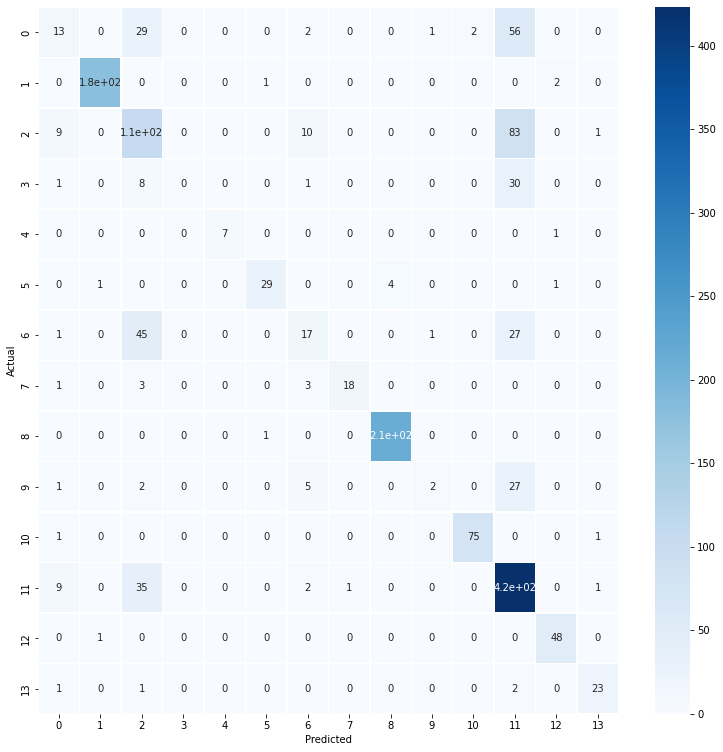

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,Ypredict)
import seaborn as sns
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(cm,cmap="Blues",annot=True,linewidths=.5,ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Ypredict)*100


73.56687898089172

In [ ]:
#72.80254777070063
#71.97452229299363
#73.56687898089172 at maxdepth 4 , learning rate 0.02
#74.39490445859872 at maxdepth 2 , learning rate 0.02
#74.84076433121018 at maxdepth 3 , learning rate 0.02
#73.20382165605095 at maxdepth 2 , learning rate 0.05
#74.20382165605095 at maxdepth 3 , learning rate 0.05
#73.94904458598725 at maxdepth 2 , learning rate 0.01
#74.3312101910828 at maxdepth 3 , learning rate 0.01
#74.52229299363057 at maxdepth 4 , learning rate 0.01

In [ ]:
Yptrain=xgb_model.predict(x_train)
accuracy_score(y_train,Yptrain)*100

84.99522140809175

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP=MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=1000)
MLP.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [ ]:
predicitions=MLP.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test,predicitions))
print(classification_report(y_test,predicitions))


[[  0   0   0   0   0   0   0   0   0   0   0   0 103   0]
 [ 18   0   0   0   0   0   0   0   1   0   0   0 163   0]
 [  1   0   0   0   0   3   0   0  20   0   0   0 186   0]
 [  0   0   0   0   0   2   0   0   7   0   0   0  31   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   8   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0  34   0]
 [  1   0   0   0   0   7   0   0   9   0   0   0  74   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  25   0]
 [  3   0   0   0   0   2   0   0  20   0   0   0 190   0]
 [  0   0   0   0   0   1   0   0   3   0   0   0  33   0]
 [  1   0   0   0   0   0   0   0   2   0   0   0  74   0]
 [  5   0   0   0   0   6   0   0  50   0   0   0 410   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  49   0]
 [  0   0   0   0   0   0   0   0   3   0   0   0  24   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.00      0.00      0.00       182
          